In [84]:
#import pandas and numpy library
import pandas as pd 
import numpy as np

In [85]:
df=pd.read_csv('titanic_train.csv')

In [86]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


we see that 891 rows and 12 columns present in our dataframe.

Data Dictionary
    .Survived: 0 = No, 1 = Yes
    .pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    .sibsp: # of siblings / spouses aboard the Titanic
    .parch: # of parents / children aboard the Titanic
    .ticket: Ticket number
    .cabin: Cabin number
    .embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [87]:
#checking null values in the dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we see that missing value present in 3 columns.the columns are
    1.Cabin
    2.Sex
    3.Embarked

since 687 data out of 891 data are missing in the 'Cabin' column,we are drop this column

In [88]:
df=df.drop(['Cabin'],axis=1)

we see that 177 missing value are present in "Age" column of the dataset.so we fill this missing value by mean value of the "age" column 

In [89]:
df["Age"]=df["Age"].replace(np.NaN,df["Age"].mean())

since 2 missing values are present in the 'Embarked' columns,we fill this missing value by which is maximum present in the 'Embarked' column.

In [90]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [91]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [92]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

we see that there is no null value present in any columns of the "Titanic" dataset

In [93]:
#checking colums name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [94]:
#checking shape of the dataframe
df.shape

(891, 11)

In [95]:
#checking datatypes of all columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

we see that ['PassengerId','survived','Pclass','Sibsp','Parch']columns are integer type,['Name','Sex','Ticket','Embarked'] columns are object data type and ['Age','Fare'] are float type

# EDA part

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age', ylabel='Count'>

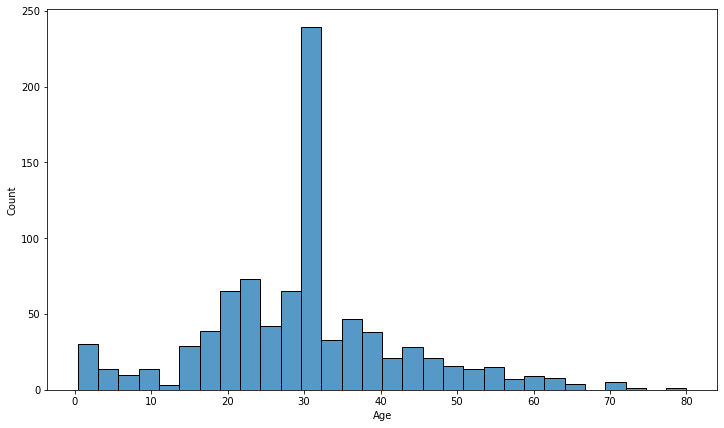

In [99]:
#histplot of"Age column
plt.figure(figsize=(12,7))
sns.histplot(df['Age'])

we see that the range of age of people is between 0 to 80.Maximum people's age between 28 to 34

<AxesSubplot:xlabel='Fare', ylabel='Count'>

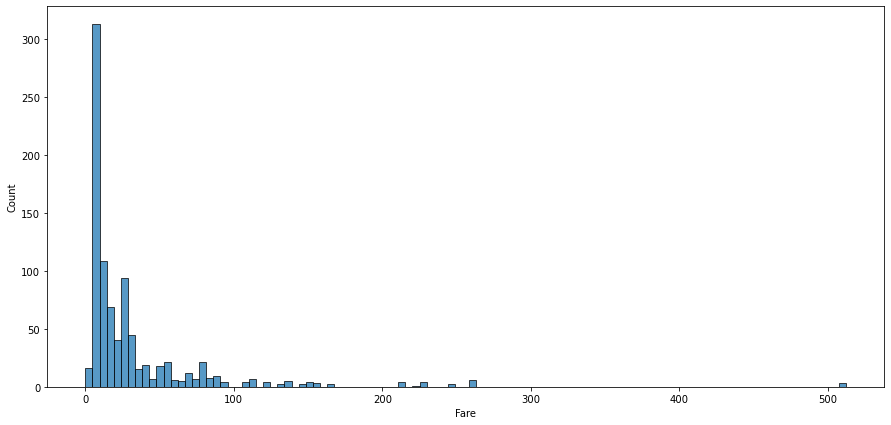

In [105]:
plt.figure(figsize=(15,7))
sns.histplot(df['Fare'])

we see that the range of fare is 0 to 520.maximum pepole's fare between 1 to 100.some people's fare between 100 to 300 and very less pepole's fare above 500

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

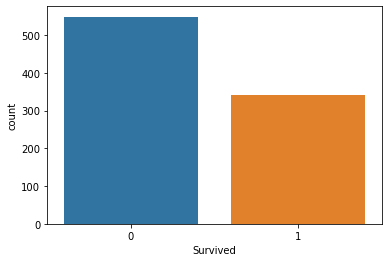

In [14]:
#Get a count of the number of survivers and Visualize the count of number of survivers
print(df['Survived'].value_counts())
sns.countplot(df['Survived'],label="Count")

here '0' shows "mans are not survived" and '1 'shows "mans are survived".
we show from the above graph that most of the people in 'Titanic' are not survived.only 342 people of the 'Titanic' are survived and 549 people are not survived out of 891 people.

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

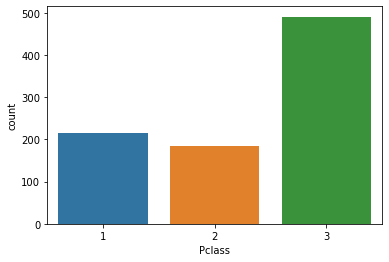

In [15]:
print(df['Pclass'].value_counts())
sns.countplot(df['Pclass'])

we see that ther are three type of class was present in the 'Titanic'.number of 1st class people is 216,number of 2nd class people is 184 and number of 3rd class people is 491.we see that maximum people are 3rd class. 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

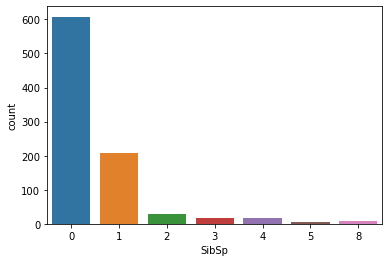

In [16]:
print(df['SibSp'].value_counts())
sns.countplot(df['SibSp'],label="Count")

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

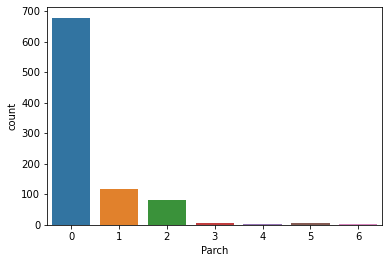

In [17]:
print(df['Parch'].value_counts())
sns.countplot(df['Parch'],label="Count")

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

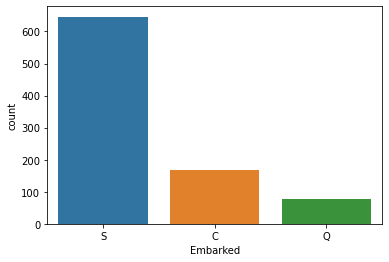

In [18]:
print(df['Embarked'].value_counts())
sns.countplot(df['Embarked'],label="Count")

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

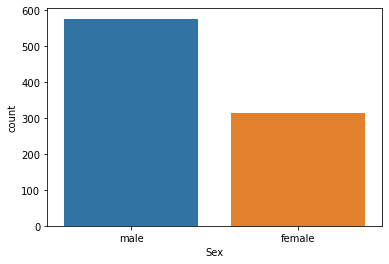

In [19]:
print(df['Sex'].value_counts())
sns.countplot(df['Sex'])

we see that ther are two types of people in 'titanic'and maximum people of the 'Titanic' are male.577 people are male and 314 people are female

<AxesSubplot:xlabel='Age', ylabel='Sex'>

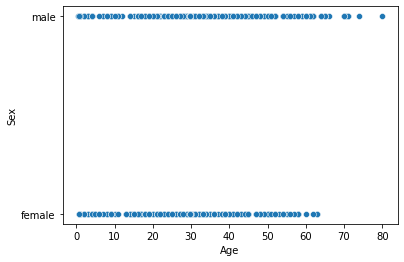

In [20]:
sns.scatterplot(df['Age'],df['Sex'])

we see that age of the male people are equally distributed in 0 to 70 and age of female people are equally distributed in 0 to 65

<AxesSubplot:xlabel='Age', ylabel='Survived'>

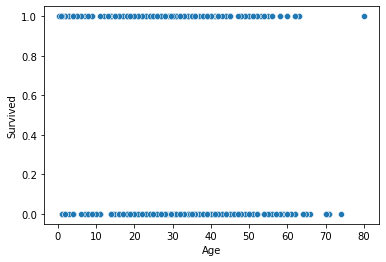

In [21]:
sns.scatterplot(df['Age'],df['Survived'])

we see from the graph that age of the survived people equally distributed in 0 to 65 and age of the non survived people are equally distributed in 0 to 70 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

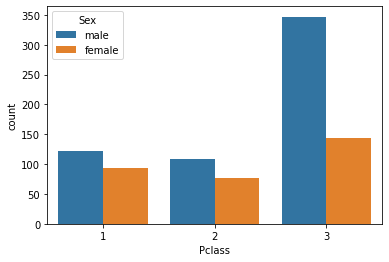

In [22]:
sns.countplot(x=df['Pclass'],hue=df['Sex'])

the above graph shows how many male and female people was present in every class of the 'Titanic'.we 

<AxesSubplot:xlabel='Survived', ylabel='count'>

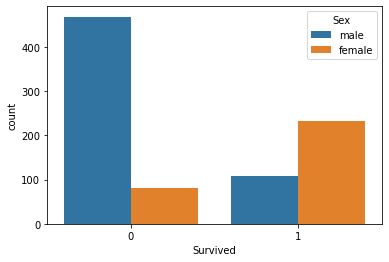

In [23]:
sns.countplot(x=df['Survived'],hue=df['Sex'])

we can see from the graph 
    1) maximum peoples of non survived people are male approximately 500 where the number of non survived female is approximately 100. 
    2) maximum peoples of survived people are female approximately 250 where the number of survived man is approximately 100.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

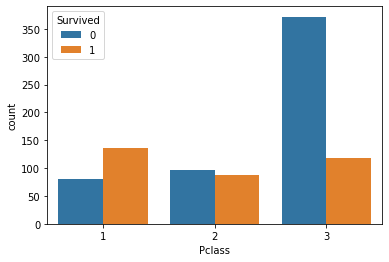

In [24]:
sns.countplot(x=df['Pclass'],hue=df['Survived'])

we see from the above graph:
    1) the difference between survived people and non survived people of the 1st class are high.
    2) the difference between survived people and non survived people of the 2nd class are same.
    3) the difference between survived people and non survived people of the 3rd class are very high

<AxesSubplot:xlabel='SibSp', ylabel='count'>

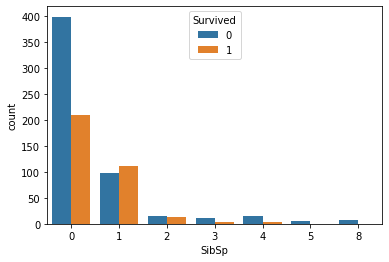

In [25]:
sns.countplot(x=df['SibSp'],hue=df['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

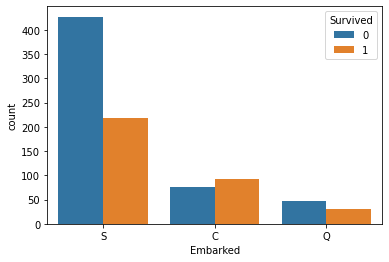

In [26]:
sns.countplot(x=df['Embarked'],hue=df['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

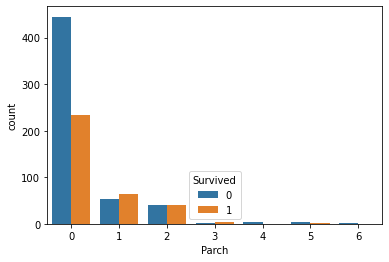

In [27]:
sns.countplot(x=df['Parch'],hue=df['Survived'])

Print the unique values of the non-numeric data.

In [28]:
#Print the unique values in the columns
print(df['Sex'].unique())
print(df['Embarked'].unique())


['male' 'female']
['S' 'C' 'Q']


we see that there are two types of value in 'sex' column and four types of value in the 'Embarked'column

Change the non-numeric data to numeric data, and print the new values.

In [29]:
#to change the non-numeric data to numeric data of 'Sex' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex']).astype(float)

In [30]:
#to change the non-numeric data to numeric data of 'Embarked' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked']).astype(float)

In [31]:
#Print the unique values in the columns
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1. 0.]
[2. 0. 1.]


In [32]:
#checking correlation
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

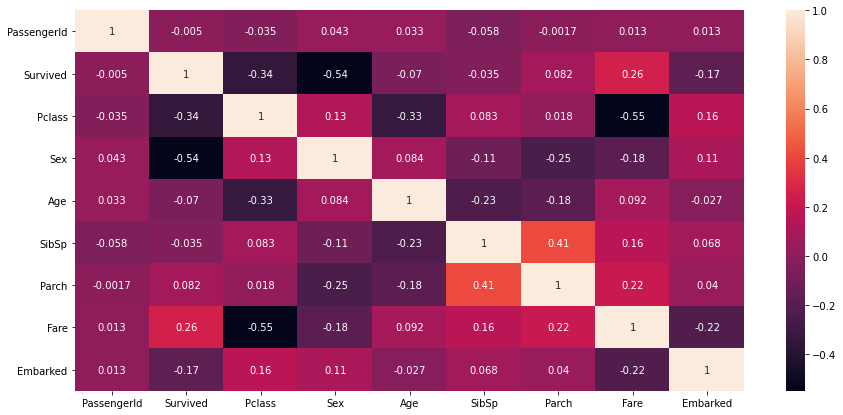

In [33]:
#checking correlation by heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

we see that
1.'Survived' column is 34 percent negatively corrlated with 'Pclass' column which is very weak bond.
2.'Survived' column is 7.7 percent negatively corrlated with 'Age' column which is very weak bond.
3.'Survived' column is 3.5 percent negatively corrlated with 'SibSp' column which is very weak bond.
4.'Survived' column is 8.2 percent positively corrlated with 'Parch' column which is not consider as a good bond.
5.'Survived' column is 26 percent positively corrlated with 'Fare' column which is consider as a good bond.

In [34]:
#skewness checking
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

we see from the above code that ['SibSp','Parch ','Fare '] columns present high skewness.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

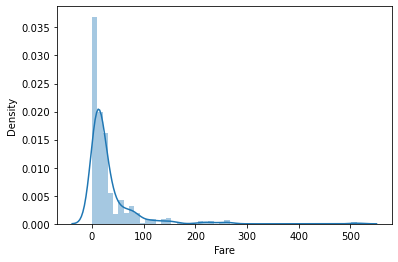

In [35]:
#now we are checking normal distribution curve of 'Fare' columns
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

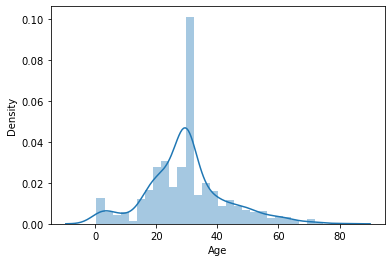

In [36]:
#now we are checking normal distribution curve of 'Age' columns
sns.distplot(df['Age'])

In [37]:
#describing dataset
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


we see the mean,std,min,25 percentile,50 percentile,75 percentile and max of the every column of the 'Titanic' dataset

<AxesSubplot:>

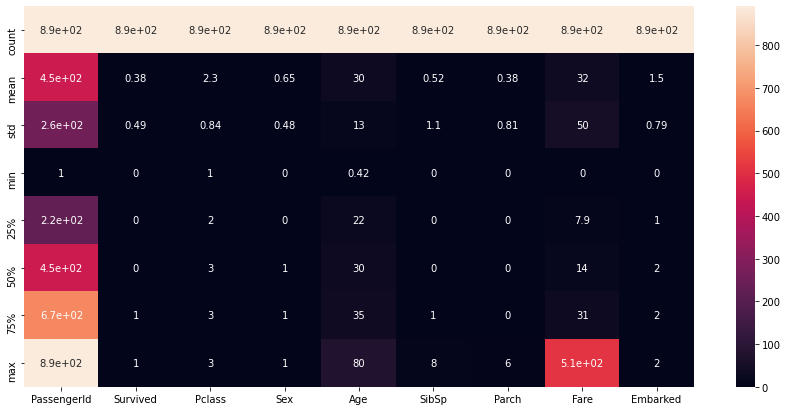

In [38]:
#describing "Titanic" by using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.describe(),annot=True)

# Checking Outliers

<AxesSubplot:xlabel='Age'>

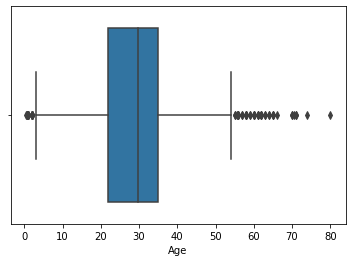

In [39]:
#checking outliers in "Age" column by box plot
sns.boxplot(df["Age"])

we see that ther are many outliers are present in the "Age" column

<AxesSubplot:xlabel='Fare'>

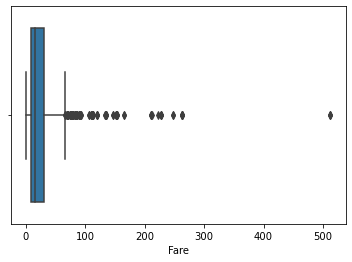

In [40]:
#checking outliers in "Fare" column by box plot
sns.boxplot(df["Fare"])

we see that huge outliers are present in the 'Fare' column

In [41]:
#droping "Name" and "ticket" columns
df=df.drop(["Name","Ticket"],axis=1)

Removing outliers and save the model into df_new variable

In [42]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [43]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
       6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [44]:
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.000000,1,0,7.2500,2.0
1,2,1,1,0.0,38.000000,1,0,71.2833,0.0
2,3,1,3,0.0,26.000000,0,0,7.9250,2.0
3,4,1,1,0.0,35.000000,1,0,53.1000,2.0
4,5,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.000000,0,0,13.0000,2.0
887,888,1,1,0.0,19.000000,0,0,30.0000,2.0
888,889,0,3,0.0,29.699118,1,2,23.4500,2.0
889,890,1,1,1.0,26.000000,0,0,30.0000,0.0


In [45]:
print(df.shape)
print(df_new.shape)

(891, 9)
(820, 9)


In [46]:
#checking percentage of dataloss
percentage_of_dataloss=((891-820)/891)*100
percentage_of_dataloss

7.968574635241302

7.96 % percent data we are loss

Dividing data in features and vectors

In [47]:
x=df_new.iloc[:,2:-1]
y=df_new.iloc[:,1]

In [48]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1.0,22.000000,1,0,7.2500
1,1,0.0,38.000000,1,0,71.2833
2,3,0.0,26.000000,0,0,7.9250
3,1,0.0,35.000000,1,0,53.1000
4,3,1.0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1.0,27.000000,0,0,13.0000
887,1,0.0,19.000000,0,0,30.0000
888,3,0.0,29.699118,1,2,23.4500
889,1,1.0,26.000000,0,0,30.0000


In [49]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

transforming data to remove skewness

In [50]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.87283049,  0.72203588, -0.61846778,  1.55188616, -0.48469263,
        -0.83470177],
       [-1.47067587, -1.38497273,  0.68588353,  1.55188616, -0.48469263,
         1.55364494],
       [ 0.87283049, -1.38497273, -0.28381447, -0.63350532, -0.48469263,
        -0.74331399],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 ,  1.55188616,  2.08665417,
         0.39490799],
       [-1.47067587,  0.72203588, -0.28381447, -0.63350532, -0.48469263,
         0.65432009],
       [ 0.87283049,  0.72203588,  0.20668289, -0.63350532, -0.48469263,
        -0.76629016]])

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.87283049,  0.72203588, -0.61846778,  1.55188616, -0.48469263,
        -0.83470177],
       [-1.47067587, -1.38497273,  0.68588353,  1.55188616, -0.48469263,
         1.55364494],
       [ 0.87283049, -1.38497273, -0.28381447, -0.63350532, -0.48469263,
        -0.74331399],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 ,  1.55188616,  2.08665417,
         0.39490799],
       [-1.47067587,  0.72203588, -0.28381447, -0.63350532, -0.48469263,
         0.65432009],
       [ 0.87283049,  0.72203588,  0.20668289, -0.63350532, -0.48469263,
        -0.76629016]])

The data is preprocessed and the data is ready fo training process

In [52]:
#checking skewness after remove skewness
df_new=pd.DataFrame(x)
df_new.skew()

0   -0.429718
1   -0.664152
2    0.071813
3    0.948944
4    1.581505
5   -0.018602
dtype: float64

we see that some skewness present in the "Parch" column

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [54]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.8536585365853658 on random state   471


we found best random state values is 471 .we will creat our train_test_split using this random state

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state =50)

In [56]:
x_train

array([[ 0.87283049,  0.72203588,  0.0200539 , -0.63350532, -0.48469263,
        -0.72719093],
       [ 0.87283049, -1.38497273, -2.47008909,  1.72572091,  2.08665417,
         0.57799357],
       [ 0.87283049,  0.72203588, -0.49216643, -0.63350532, -0.48469263,
        -0.83764153],
       ...,
       [-0.59549979, -1.38497273,  0.24701592, -0.63350532, -0.48469263,
        -0.22737215],
       [-0.59549979, -1.38497273,  0.52727023,  1.55188616, -0.48469263,
         0.50372712],
       [-0.59549979, -1.38497273,  0.04455768, -0.63350532, -0.48469263,
        -0.22737215]])

In [57]:
x_test

array([[-1.47067587,  0.72203588,  0.12578167,  1.55188616, -0.48469263,
         1.22866277],
       [-0.59549979, -1.38497273, -0.4502875 , -0.63350532, -0.48469263,
        -0.22737215],
       [-0.59549979,  0.72203588,  0.04455768, -0.63350532, -0.48469263,
        -0.22737215],
       ...,
       [ 0.87283049,  0.72203588,  0.84346348,  1.55188616,  2.0509052 ,
        -0.0421003 ],
       [ 0.87283049, -1.38497273, -0.20117288, -0.63350532, -0.48469263,
        -0.74331399],
       [ 0.87283049,  0.72203588, -0.4502875 , -0.63350532, -0.48469263,
        -0.76023055]])

In [58]:
y_train

95     0
642    0
296    0
496    1
351    0
      ..
146    1
317    0
123    1
518    1
747    1
Name: Survived, Length: 574, dtype: int64

In [59]:
y_test

671    0
345    1
178    0
693    0
432    1
      ..
424    0
222    0
188    0
216    1
499    0
Name: Survived, Length: 246, dtype: int64

In [60]:
x_train.shape

(574, 6)

In [61]:
x_test.shape

(246, 6)

In [62]:
y_train.shape

(574,)

In [63]:
y_test.shape

(246,)

In [64]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [65]:
model=[lg,gnb,svc,dtc,knn,rfc]

In [66]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression() is
0.8008130081300813
[[123  24]
 [ 25  74]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       147
           1       0.76      0.75      0.75        99

    accuracy                           0.80       246
   macro avg       0.79      0.79      0.79       246
weighted avg       0.80      0.80      0.80       246



Accuracy score of  GaussianNB() is
0.7235772357723578
[[110  37]
 [ 31  68]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       147
           1       0.65      0.69      0.67        99

    accuracy                           0.72       246
   macro avg       0.71      0.72      0.72       246
weighted avg       0.73      0.72      0.72       246



Accuracy score of  SVC() is
0.7967479674796748
[[126  21]
 [ 29  70]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       147
 

In [67]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print("cross validation score of",m,"is =",scr.mean())

cross validation score of LogisticRegression() is = 0.7951219512195122
cross validation score of GaussianNB() is = 0.7573170731707316
cross validation score of SVC() is = 0.8219512195121952
cross validation score of DecisionTreeClassifier() is = 0.7646341463414633
cross validation score of KNeighborsClassifier() is = 0.8158536585365853
cross validation score of RandomForestClassifier() is = 0.8036585365853659


In [68]:
#creating parameter list to pass in GreadSearchCV
parameters={'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[2,3,4,5,6,7,8,9],'weights':['uniform', 'distance'],'leaf_size':[10,20,30,40,50,60,70,80,90,100]}
gcv=GridSearchCV(KNeighborsClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'p': 5, 'weights': 'uniform'}

In [69]:
gcv.best_estimator_

KNeighborsClassifier(leaf_size=10, p=5)

In [70]:
gcvpred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcvpred)

0.7886178861788617

In [108]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt'}

In [109]:
gcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt')

In [110]:
gcvpred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcvpred)

0.8211382113821138

In [111]:
scr=cross_val_score(gcv.best_estimator_,x,y,cv=5)
print("cross validation score of",m,"is =",scr.mean())

cross validation score of RandomForestClassifier() is = 0.8109756097560977


ROCAUC curve

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.44156926, 0.80846435, 0.23515407, 0.1032551 , 0.72209482,
       0.79870104, 0.08457623, 0.42948124, 0.78508934, 0.12129655,
       0.12496267, 0.81110756, 0.08797643, 0.64692297, 0.77036308,
       0.62133116, 0.21227282, 0.41756765, 0.21227282, 0.44439988,
       0.5976368 , 0.87073552, 0.11316018, 0.13213648, 0.05143925,
       0.89806548, 0.13112755, 0.94645051, 0.94747433, 0.94235013,
       0.08116697, 0.53587176, 0.08870912, 0.07579422, 0.61794624,
       0.55928753, 0.08952103, 0.56862242, 0.53369656, 0.10352656,
       0.53163079, 0.08901902, 0.0924381 , 0.66345666, 0.87617411,
       0.9381797 , 0.59227977, 0.73416898, 0.44657473, 0.44343174,
       0.53587176, 0.21599862, 0.08436009, 0.48292118, 0.09341284,
       0.08952103, 0.12090675, 0.10808956, 0.92115531, 0.28278782,
       0.62810183, 0.13471641, 0.1860525 , 0.53369656, 0.53348425,
       0.09654977, 0.82058502, 0.41190453, 0.12925227, 0.5245588 ,
       0.55552234, 0.09258144, 0.28506663, 0.06809793, 0.78664

In [74]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [75]:
fpr

array([0.        , 0.        , 0.        , 0.01360544, 0.01360544,
       0.02040816, 0.02040816, 0.02721088, 0.02721088, 0.04081633,
       0.04081633, 0.06122449, 0.06122449, 0.06122449, 0.06122449,
       0.07482993, 0.07482993, 0.08163265, 0.08163265, 0.0952381 ,
       0.0952381 , 0.10884354, 0.10884354, 0.10884354, 0.10884354,
       0.1292517 , 0.1292517 , 0.1292517 , 0.1292517 , 0.14285714,
       0.14285714, 0.16326531, 0.16326531, 0.17006803, 0.17006803,
       0.17687075, 0.17687075, 0.23129252, 0.23129252, 0.23809524,
       0.23809524, 0.27210884, 0.27210884, 0.29251701, 0.30612245,
       0.33333333, 0.33333333, 0.34693878, 0.36734694, 0.36734694,
       0.38095238, 0.44897959, 0.44897959, 0.48979592, 0.48979592,
       0.50340136, 0.5170068 , 0.60544218, 0.60544218, 0.66666667,
       0.68027211, 0.68707483, 0.68707483, 0.70748299, 0.70748299,
       0.71428571, 0.71428571, 0.75510204, 0.78231293, 0.79591837,
       0.79591837, 0.80952381, 0.83673469, 0.85034014, 0.85034

In [76]:
tpr

array([0.        , 0.01010101, 0.27272727, 0.27272727, 0.35353535,
       0.35353535, 0.43434343, 0.43434343, 0.45454545, 0.45454545,
       0.47474747, 0.47474747, 0.50505051, 0.52525253, 0.53535354,
       0.53535354, 0.55555556, 0.55555556, 0.56565657, 0.56565657,
       0.57575758, 0.57575758, 0.60606061, 0.62626263, 0.64646465,
       0.64646465, 0.66666667, 0.70707071, 0.71717172, 0.71717172,
       0.73737374, 0.73737374, 0.75757576, 0.75757576, 0.77777778,
       0.77777778, 0.80808081, 0.80808081, 0.81818182, 0.81818182,
       0.83838384, 0.83838384, 0.84848485, 0.84848485, 0.84848485,
       0.84848485, 0.85858586, 0.85858586, 0.85858586, 0.86868687,
       0.87878788, 0.87878788, 0.8989899 , 0.8989899 , 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.91919192, 0.91919192,
       0.91919192, 0.91919192, 0.92929293, 0.92929293, 0.93939394,
       0.93939394, 0.95959596, 0.95959596, 0.95959596, 0.95959596,
       0.96969697, 0.96969697, 0.96969697, 0.96969697, 0.97979

In [77]:
thresholds

array([1.96115433, 0.96115433, 0.83021813, 0.8210939 , 0.79870104,
       0.79074422, 0.73416898, 0.72242035, 0.7001568 , 0.66857534,
       0.64692297, 0.62810183, 0.62133116, 0.61794624, 0.61747641,
       0.59806781, 0.5976368 , 0.59457262, 0.59227977, 0.5846514 ,
       0.57336831, 0.56862242, 0.56435739, 0.55928753, 0.55899972,
       0.5401183 , 0.53587176, 0.53369656, 0.53348425, 0.53025922,
       0.5245588 , 0.50217551, 0.49503402, 0.48292118, 0.45656939,
       0.45546621, 0.44343174, 0.38524355, 0.37839   , 0.37255876,
       0.36905111, 0.30252866, 0.29451074, 0.27525374, 0.26668585,
       0.2511854 , 0.24254455, 0.23515407, 0.22075888, 0.21599862,
       0.21227282, 0.15201444, 0.14754355, 0.13471641, 0.13445834,
       0.13112755, 0.12925227, 0.11331524, 0.11316018, 0.1032551 ,
       0.10163076, 0.10134614, 0.10117438, 0.09654977, 0.09554902,
       0.09470246, 0.09455661, 0.09341284, 0.09258144, 0.09203697,
       0.08998144, 0.08954594, 0.08952103, 0.08870912, 0.08797

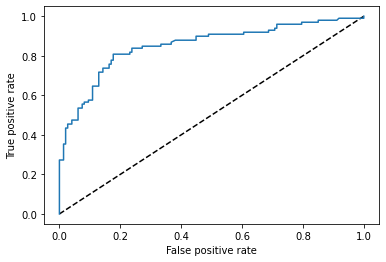

In [79]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [106]:
auc_score=roc_auc_score(y_test,svc.predict(x_test))

In [107]:
auc_score

0.7821067821067822

we see that accuracy score is good in gcv.best_estimator_ model and this accuracy score is nearly to the cross val score of randomforest classifier.so, this is a good approach and we save this model

#Saving the model
import joblib
joblib.dump(gcv.best_estimator_,'Titanic Project Model.pkl')